In [4]:
from google.colab import files
myFile= files.upload()

Saving y.csv to y (1).csv
Saving X_t.csv to X_t.csv
Saving X.csv to X (1).csv


sample_data  X (1).csv	X.csv  X_t.csv	y (1).csv  y.csv


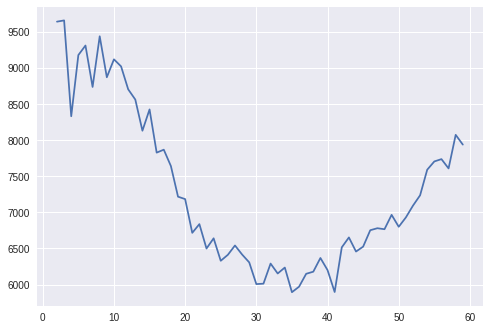

In [111]:
!ls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GMM


import warnings
warnings.filterwarnings('ignore')

Xdf= pd.read_csv('X.csv',header=None,delimiter=" ")
ydf= pd.read_csv('y.csv',header=None,delimiter=" ")
X_tdf= pd.read_csv('X_t.csv',header=None,delimiter=" ")
Xdf=Xdf.drop(0,axis=1)

Xdf_v=Xdf.values
# Searching for the number of componenents that minimize the AIC
n_components = np.arange(2, 60)
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]

aics = [model.fit(Xdf_v).aic(Xdf_v) for model in models]
plt.plot(n_components, aics)
# from the plot, approximative number is 35

In [112]:
# a guassian model with 35 components
gmm = GMM(35, covariance_type='full', random_state=0)
# fitting to the data
gmm.fit(Xdf_v)
# verify convergence
print(gmm.converged_)

True


In [0]:
# generate the new data
Xdf_vn = gmm.sample(100, random_state=0)

In [114]:
# combine new and old data
Xdf_v=np.append(Xdf_v,Xdf_vn,axis=0)
print(Xdf_v.shape)

(280, 13)


In [0]:
# apply k-mean on the new  and old data
X_tdf= pd.read_csv('X_t.csv',header=None,delimiter=" ")
X_tdf=X_tdf.drop(0,axis=1)



In [124]:
print (Xdf_v.shape)
# without centroid initialization

from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=2, n_init=20, n_jobs=4)   
kmeans.fit(Xdf_v)  
y_clu=kmeans.predict(X_tdf.values)

(280, 13)


In [155]:
y_r=kmeans.transform(X_tdf.values)
y_res=np.empty(len(y_r))


for i in range(len(y_r)):
  y_res[i]=y_r[i,y_clu[i]]
print(y_res)
print(y_res.reshape(1,-1))
# rescale y_res
y_res= (y_res- min(y_res))/(max(y_res)-min(y_res))
print(y_res)

[ 39.93941333  44.28448276  48.16151608  44.67569213  53.4159476
  17.34588682  48.98041769  38.86401398  42.63845987  36.98406421
  55.09700575  27.79235373  51.74022983 118.63827731  20.59564643
  30.22564372  47.07355579  66.12943222  24.44496387  17.50016121
  33.58895533  26.79827616  11.59413072  41.87290989  22.87711151
  54.4798708   53.00492738  15.35849411  41.55079735  24.58235619
  53.48393606  39.84431549  44.88026758  31.13487139  33.62193658
  29.62748371  58.16365923  33.00202521  31.7135417   33.59318679
 118.97206924  45.68855375  51.64673975  41.12821967  20.62192573
  44.8038992   26.92567844  67.78332305  21.4450466   28.68584849
  26.67479284  19.86185755  68.05355198  22.63243031  78.13034148
  37.7468082   48.93183498  35.25784857  36.65677335  34.31486306
  46.67495877  41.03117161  55.15347876  31.02994733  16.31090563
  39.52936233  40.56559064  38.40869239  21.13573863  48.80895727
  46.86380001  51.25935644  61.64333455  35.14799977  37.98943668
  33.588434

In [0]:
from pandas import DataFrame as DF
Y_res= DF(y_res)

Y_res.to_csv("y_res.csv",index=False, header=False)

In [157]:
!ls
files.download("y_res.csv")

sample_data  X (1).csv	X.csv  X_t.csv	y (1).csv  y.csv  y_res.csv
